# 1. Cities in Sweden - create dataset

In [1]:
import pandas as pd

test_dict = {
    "Kommun": ["Malmo", "Stockholm", "Uppsala", "Goteborg"],
    "Population": [347949, 975551, 233839, 583056]
    }

df = pd.DataFrame(test_dict)

df


,Kommun,Population
0,Malmo,347949
1,Stockholm,975551
2,Uppsala,233839
3,Goteborg,583056


In [2]:
df[df["Kommun"] == "Goteborg"]
df.loc[df["Kommun"] == "Goteborg"]

,Kommun,Population
3,Goteborg,583056


In [3]:
df.sort_values(by="Population", ascending=False)[:3]
df.sort_values(by="Population", ascending=False).head(3)


,Kommun,Population
1,Stockholm,975551
3,Goteborg,583056
0,Malmo,347949


In [4]:
df["Population (%)"] =  (df['Population']/10379295)*100
# df.rename("test" == "Full", axis = 1)
pd.options.display.float_format = '{:.1f}'.format
df

,Kommun,Population,Population (%)
0,Malmo,347949,3.4
1,Stockholm,975551,9.4
2,Uppsala,233839,2.3
3,Goteborg,583056,5.6


# 2. Cities in Sweden - real dataset

In [5]:
df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")

df.rename(
    {
        "Unnamed: 0": "Rang 2020",
        "Unnamed: 1": "Rang2019",
        "Unnamed: 2": "Kommun",
        "Unnamed: 3": "Folkmangd 2020",
        "Unnamed: 4": "Folkmangd 2019",
        "Unnamed: 5": "Forandring"
    },
    axis=1, inplace=True)
df = df[6:].reset_index()
del df["index"]
df

,Rang 2020,Rang2019,Kommun,Folkmangd 2020,Folkmangd 2019,Forandring
0,83,84.0,Ale,31868,31402.0,1.5
1,64,64.0,Alingsås,41602,41420.0,0.4
2,123,123.0,Alvesta,20224,20134.0,0.4
3,255,255.0,Aneby,6821,6848.0,-0.4
4,169,167.0,Arboga,14039,14087.0,-0.3
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.3
286,116,115.0,Östhammar,22251,22250.0,0.0
287,160,159.0,Östra Göinge,15017,15007.0,0.1
288,284,284.0,Överkalix,3289,3315.0,-0.8


In [6]:
df["Rang 2020"] = df["Rang 2020"].astype(int)
df["Rang2019"] = df["Rang2019"].astype(int)
df["Folkmangd 2020"] = df["Folkmangd 2020"].astype(int)
df["Folkmangd 2019"] = df["Folkmangd 2019"].astype(int)
df["Forandring"] = df["Forandring"].astype(float)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rang 2020       290 non-null    int64  
 1   Rang2019        290 non-null    int64  
 2   Kommun          290 non-null    object 
 3   Folkmangd 2020  290 non-null    int64  
 4   Folkmangd 2019  290 non-null    int64  
 5   Forandring      290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


,Rang 2020,Rang2019,Folkmangd 2020,Folkmangd 2019,Forandring
count,290.0,290.0,290.0,290.0,290.0
mean,145.5,145.5,35790.7,35612.4,0.2
std,83.9,83.9,74627.0,74292.5,1.0
min,1.0,1.0,2387.0,2408.0,-3.2
25%,73.2,73.2,10014.5,10075.0,-0.4
50%,145.5,145.5,16079.5,15978.0,0.1
75%,217.8,217.8,36215.2,36096.8,0.7
max,290.0,290.0,975551.0,974073.0,4.1


In [7]:
df_smallest = df.sort_values(by="Folkmangd 2020", ascending=False)[-5:]
df_largest = df.sort_values(by="Folkmangd 2020", ascending=False)[:5]

In [8]:
df["Folkmangd 2020"].sum()

10379295

<AxesSubplot: title={'center': 'test'}, xlabel='Kommun', ylabel='Folkmangd 2020'>

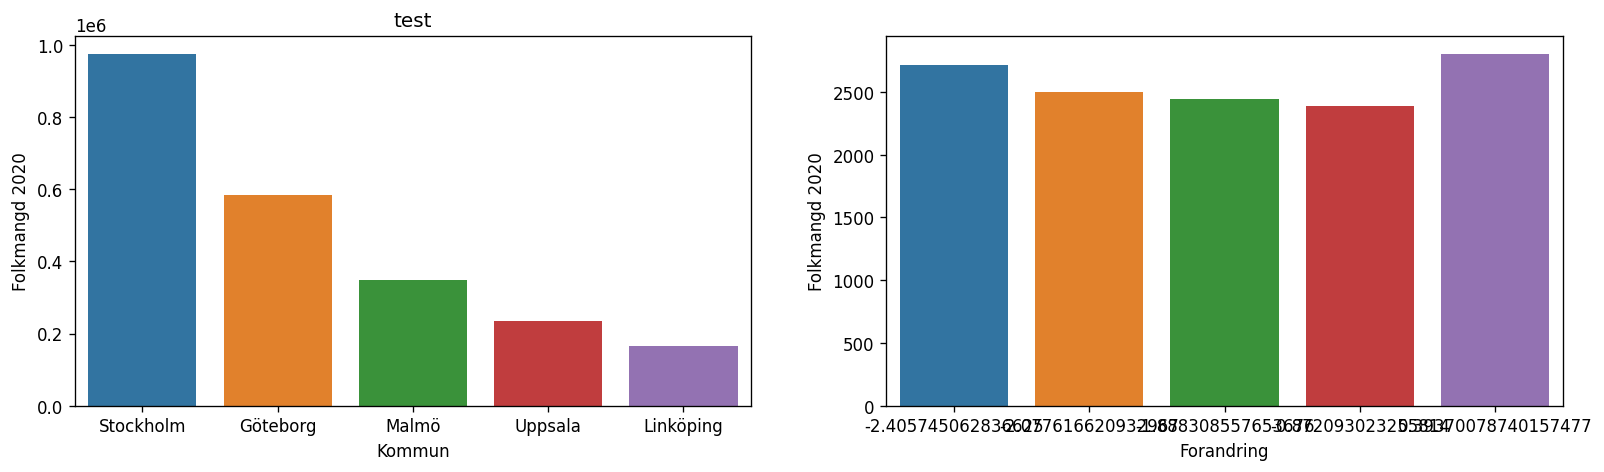

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize = (16,4), dpi=120)

ax[0].set_title("test")
sns.barplot(data=df_smallest, x="Forandring",  y="Folkmangd 2020", ax = ax[1])
sns.barplot(data=df_largest, x="Kommun",  y="Folkmangd 2020", ax = ax[0])

<AxesSubplot: title={'center': 'Befolkning minsta'}, xlabel='Kommun', ylabel='Folkmangd 2020'>

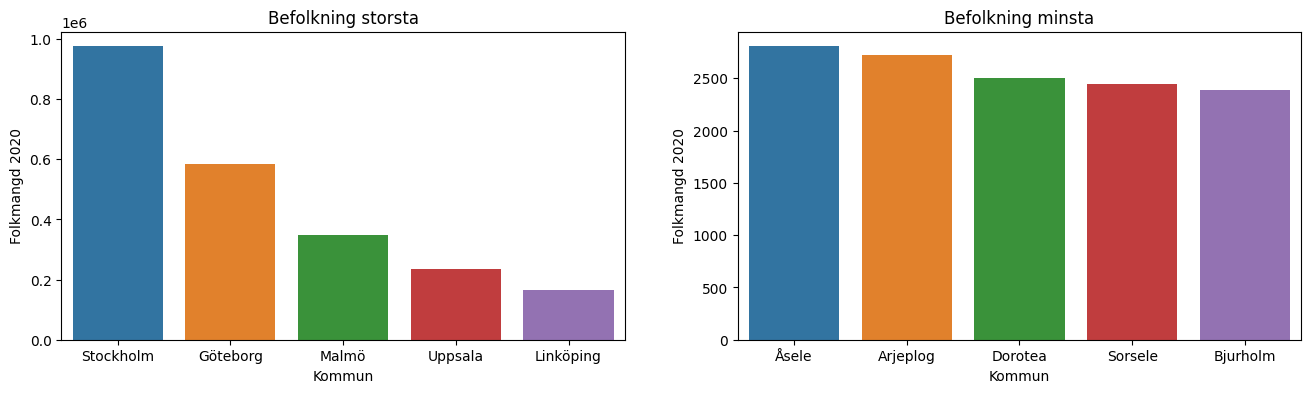

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(data=df_largest, x="Kommun", y="Folkmangd 2020")
plt.title("Befolkning storsta")
plt.subplot(1,2,2)
plt.title("Befolkning minsta")
sns.barplot(data=df_smallest, x="Kommun", y="Folkmangd 2020")


# 3. Cities in Sweden - gender

In [272]:
pd.options.display.float_format = '{:.6f}'.format

df_total = pd.read_excel("../Data/komtopp50_2020.xlsx", header = 6, usecols="A:F", sheet_name="Totalt")
df_men = pd.read_excel("../Data/komtopp50_2020.xlsx", header = 6, usecols="A:F", sheet_name="Män")
df_women = pd.read_excel("../Data/komtopp50_2020.xlsx", header = 6, usecols="A:F", sheet_name="Kvinnor")


def cleanup_cities(df: pd.DataFrame, kon = None):
    df.rename(
        {
            # "2020": "Rang 2020",
            # "2019": "Rang 2019",
            2020: "Rang 2020",
            2019: "Rang 2019",            
            "Unnamed: 2": "Kommun",
            "2020.1": "Folkmangd 2020",
            "2019.1": "Folkmangd 2019",
            "%": "Forandring"
        },
        axis=1, inplace=True)
        
    if kon:
        df["Kon"] = kon

cleanup_cities(df_total)
cleanup_cities(df_men, kon="Man")
cleanup_cities(df_women, kon="Kvinna")

In [273]:

df_total = df.filter(items=["Kommun", "Folkmangd 2020", "Folkmangd 2019", "Forandring"])

df_total.rename(
    {
        "Folkmangd 2020": "Total Pop 2020", 
        "Folkmangd 2019": "Total Pop 2019",
        "Forandring": "Total forandring"
        }, 
        axis=1, inplace=True)
df_total.set_index("Kommun", inplace=True)
df_total


,Total Pop 2020,Total Pop 2019,Total forandring
Kommun,,,
Ale,31868,31402,1.483982
Alingsås,41602,41420,0.439401
Alvesta,20224,20134,0.447005
Aneby,6821,6848,-0.394276
Arboga,14039,14087,-0.340740
...,...,...,...
Österåker,46644,45574,2.347830
Östhammar,22251,22250,0.004494
Östra Göinge,15017,15007,0.066636


In [274]:
df_men.set_index("Kommun", inplace=True)
df_women.set_index("Kommun", inplace=True)

del df_men["Rang 2020"]
del df_men["Rang 2019"]
del df_women["Rang 2020"]
del df_women["Rang 2019"]

df_men = pd.concat([df_men, df_total], axis=1)
df_women = pd.concat([df_women, df_total], axis=1)

In [275]:
# some way to concat without Kommun as index?
df_both = pd.concat([df_men, df_women])

df_both.sort_values("Kommun", inplace=True)
df_both.reset_index(inplace=True)


<AxesSubplot: xlabel='Folkmangd 2020', ylabel='Kommun'>

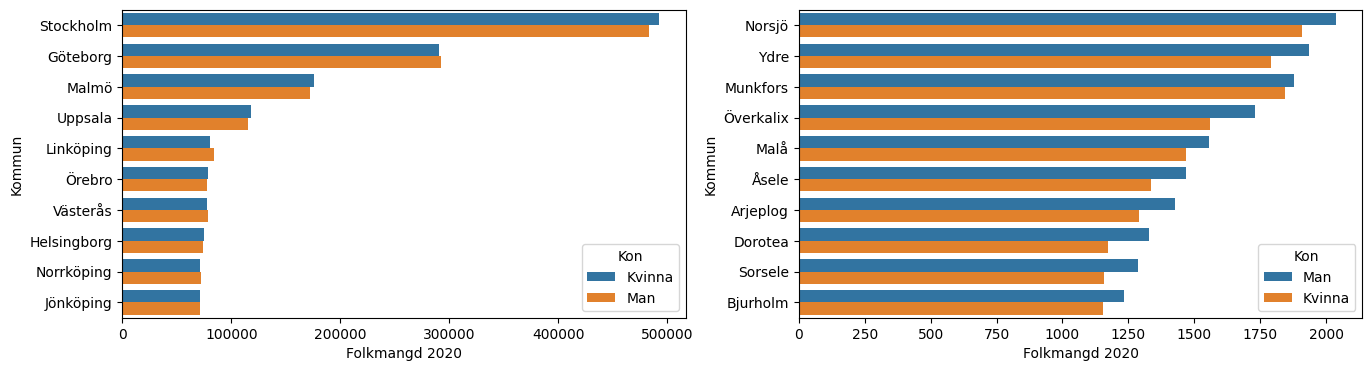

In [276]:
df_both.sort_values("Total Pop 2020", ascending=False, inplace=True)

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.barplot(data = df_both[:20], y="Kommun", x="Folkmangd 2020", hue="Kon", ax=ax[0])
sns.barplot(data = df_both[-20:], y="Kommun", x="Folkmangd 2020", hue="Kon", ax = ax[1])


Text(0.5, 1.0, 'Konsfordelning')

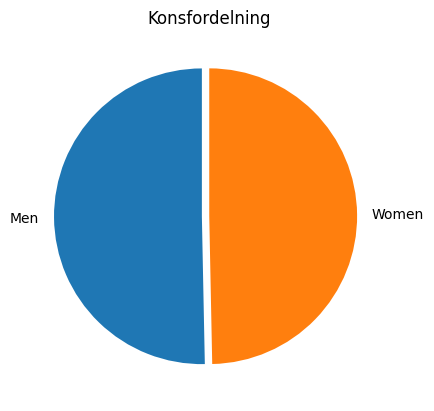

In [277]:
plt.pie([df_men["Folkmangd 2020"].sum(), df_women["Folkmangd 2020"].sum()], labels=["Men", "Women"], startangle=90, explode= [0.05,0])
plt.title("Konsfordelning")

/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_54192/1309936030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both_ind["sex_difference"][i] = diff / df_both_ind["Total Pop 2020"][i]


<AxesSubplot: xlabel='Kommun', ylabel='Folkmangd 2020'>

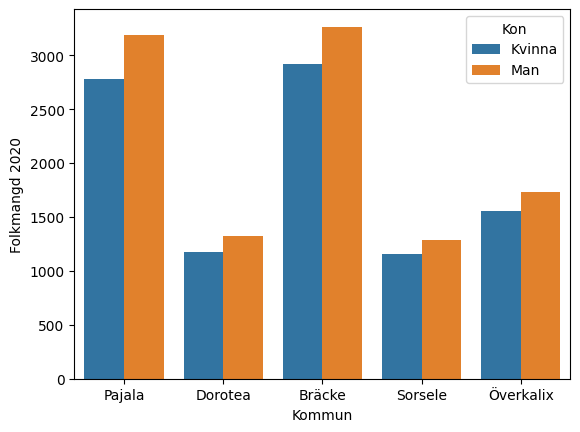

In [278]:
df_both_ind = df_both.set_index("Kommun")
df_both_ind["sex_difference"] = None

for i in df_men.index:
    diff = abs(df_both_ind["Folkmangd 2020"][i][0] - df_both_ind["Folkmangd 2020"][i][1])
    df_both_ind["sex_difference"][i] = diff / df_both_ind["Total Pop 2020"][i]

df_both_ind.sort_values(by="sex_difference", ascending=False, inplace=True)
df_both_ind.reset_index(inplace=True)

sns.barplot(data=df_both_ind[:10], x = "Kommun", y = "Folkmangd 2020", hue="Kon")


In [299]:
df_men.sort_values(by ="Folkmangd 2020").iloc[-4:]

,Folkmangd 2020,Folkmangd 2019,Forandring,Kon,Total Pop 2020,Total Pop 2019,Total forandring
Kommun,,,,,,,
Uppsala,115692,114333,1.188633,Man,233839,230767,1.331213
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179
Göteborg,292505,290308,0.756782,Man,583056,579281,0.651670
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734


,Total Pop 2020,Total Pop 2019,Total forandring,Total absolut forandring
Kommun,,,,
Ale,31868,31402,1.483982,466
Alingsås,41602,41420,0.439401,182
Alvesta,20224,20134,0.447005,90
Aneby,6821,6848,-0.394276,-27
Arboga,14039,14087,-0.340740,-48
...,...,...,...,...
Österåker,46644,45574,2.347830,1070
Östhammar,22251,22250,0.004494,1
Östra Göinge,15017,15007,0.066636,10


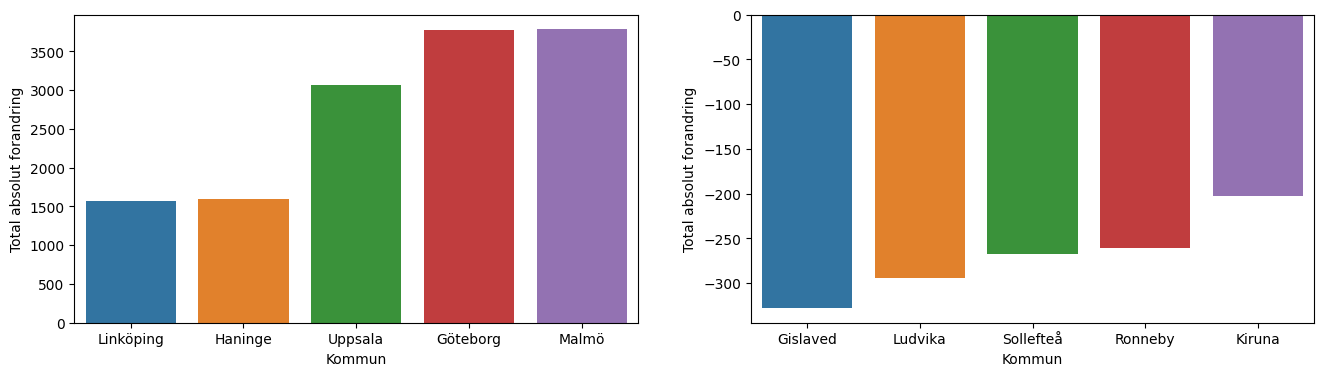

In [306]:
df_total["Total absolut forandring"] = df_total["Total Pop 2020"] - df_total["Total Pop 2019"]

fig, ax = plt.subplots(1,2, figsize = (16,4))
sns.barplot(data=df_total.sort_values(by="Total absolut forandring")[-5:].reset_index(), x="Kommun", y="Total absolut forandring", ax = ax[0])
sns.barplot(data=df_total.sort_values(by="Total absolut forandring")[:5].reset_index(), x="Kommun", y="Total absolut forandring", ax = ax[1])

df_total

<AxesSubplot: xlabel='Kommun', ylabel='Folkmangd 2020'>

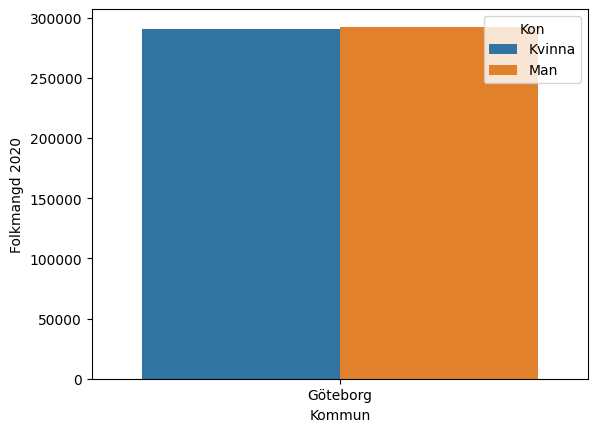

In [310]:
sns.barplot(data=df_both.loc[df_both["Kommun"] == "Göteborg"], x="Kommun", y = "Folkmangd 2020", hue="Kon")

In [312]:
# loc primarily useful when having named index?
# otherwise can just do df_total[df_total["Kommun"] == Stockholm] ?
df_total.loc["Stockholm"]

Total Pop 2020             975551.000000
Total Pop 2019             974073.000000
Total forandring                0.151734
Total absolut forandring     1478.000000
Name: Stockholm, dtype: float64